In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

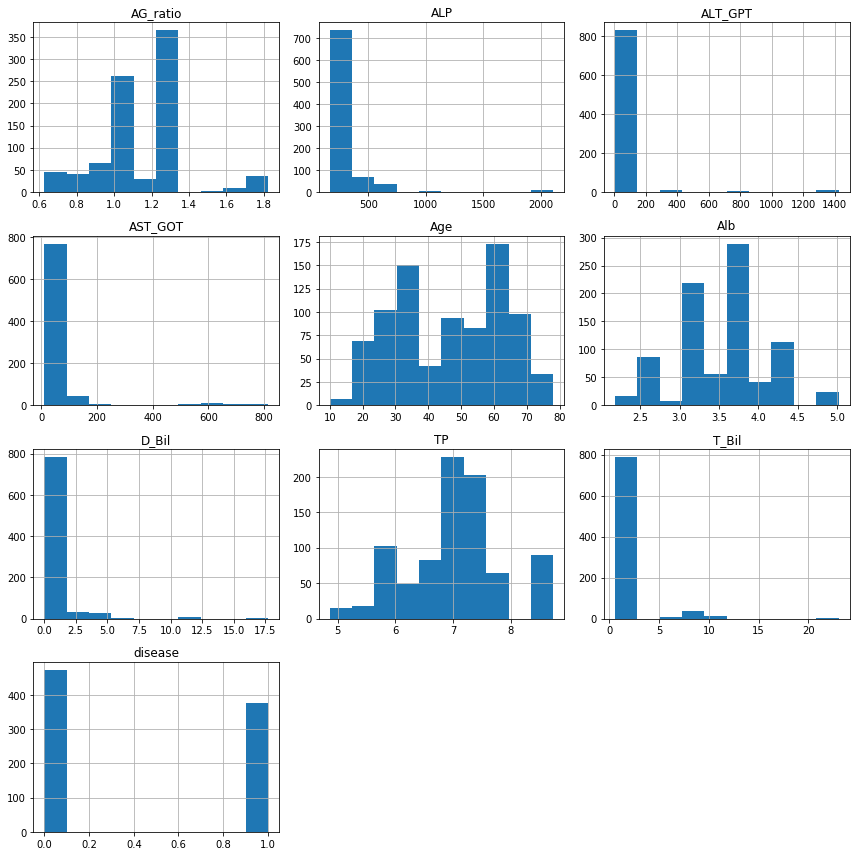

In [98]:
train.hist(figsize=(12, 12))
plt.tight_layout()
plt.show();

In [99]:
out_ALP = train[train.ALP > 2000]
out_ALP

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
428,22,Male,1.486478,0.499014,2108.483728,18.653754,65.053811,6.855430,3.609162,0.987189,1
531,51,Female,0.763286,0.188452,2032.290660,43.783400,68.801471,8.593563,3.641546,1.000775,1
710,57,Male,0.747994,0.098949,2064.375508,16.895317,177.036081,7.418547,3.675248,1.003414,1


In [100]:
train = train.drop(out_ALP.index, axis=0)

In [101]:
out_D_Bil = train[train.D_Bil > 15]
out_D_Bil 

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
240,50,Female,21.184706,17.264120,214.413921,16.616958,28.436753,8.639342,3.089583,1.225404,1
297,32,Male,23.013928,17.692164,206.635298,10.197751,22.378512,5.844967,3.136777,1.184554,1


In [102]:
train = train.drop(out_D_Bil.index, axis=0)

In [103]:
out_T_Bil = train[train.T_Bil > 15]
out_T_Bil

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
69,26,Male,23.017027,11.992452,214.777736,12.921732,98.892019,7.595521,3.585702,0.987575,1
468,32,Male,23.002653,11.978404,1861.148040,23.111268,62.911839,6.882093,3.203098,0.913798,1


In [104]:
train = train.drop(out_T_Bil.index, axis=0)

In [105]:
train = pd.get_dummies(train)
train.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Gender_Female,Gender_Male
0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0,0,1
1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1,0,1
2,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0,0,1
3,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1,0,1
4,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,1,0


In [106]:
trainX = train.drop(['disease'], axis=1)
trainY = train['disease']

In [107]:
# ライブラリのimport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures

# 多項式・交互作用特徴量の生成
polynomial = PolynomialFeatures(degree=3, include_bias=False)
polynomial_arr = polynomial.fit_transform(trainX)

# polynomial_arrのデータフレーム化 （※カラムはshape[1]でpolynomial_arrの列数分だけ出力）
trainX_polynomial = pd.DataFrame(polynomial_arr, columns=["poly" + str(x) for x in range(polynomial_arr.shape[1])])

# 生成した多項式・交互作用特徴量の表示
print(trainX_polynomial.shape)
print(trainX_polynomial.head())

(843, 363)
   poly0     poly1     poly2       poly3      poly4       poly5     poly6  \
0   59.0  0.786886  0.150498  220.178691  13.467617   21.729246  6.815731   
1   69.0  1.003987  0.195625  221.218413  51.033462   64.752323  6.889608   
2   65.0  0.657140  0.081287  320.770533  12.625011   30.613180  5.947767   
3   65.0  0.906822  0.214173  369.278160  34.347597   54.510085  6.967183   
4   22.0  1.734959  0.197706  222.782025  20.572891  170.010177  5.837537   

      poly7     poly8  poly9  ...   poly353   poly354   poly355   poly356  \
0  3.112276  1.006802    0.0  ...  1.020544  0.000000  1.013649  0.000000   
1  3.051521  0.751346    0.0  ...  0.424151  0.000000  0.564521  0.000000   
2  2.489167  0.774952    0.0  ...  0.465397  0.000000  0.600550  0.000000   
3  3.613837  0.988155    0.0  ...  0.964883  0.000000  0.976449  0.000000   
4  3.068697  1.026654    1.0  ...  1.082114  1.054019  0.000000  1.026654   

   poly357   poly358  poly359  poly360  poly361  poly362  
0   

In [108]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(trainX_polynomial)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [109]:
# ライブラリのimport
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# 組み込み法に使うモデルの指定
fs_model = xgb.XGBClassifier()

# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model)

In [110]:
# 特徴量選択の実行
selector.fit(trainX_polynomial, trainY)
mask = selector.get_support()

# 選択された特徴量だけのサンプル取得
trainX_polynomial_masked = trainX_polynomial.loc[:, mask]

print("選択された特徴量の表示（最初の5行）")
print(trainX_polynomial_masked.head())
print("選択された特徴量の数の確認")
print(trainX_polynomial_masked.shape)

選択された特徴量の表示（最初の5行）
      poly1     poly2       poly3      poly4     poly6     poly7     poly8  \
0  0.786886  0.150498  220.178691  13.467617  6.815731  3.112276  1.006802   
1  1.003987  0.195625  221.218413  51.033462  6.889608  3.051521  0.751346   
2  0.657140  0.081287  320.770533  12.625011  5.947767  2.489167  0.774952   
3  0.906822  0.214173  369.278160  34.347597  6.967183  3.613837  0.988155   
4  1.734959  0.197706  222.782025  20.572891  5.837537  3.068697  1.026654   

      poly25      poly26    poly29  ...      poly315     poly317     poly321  \
0  10.597480   17.098440  0.792238  ...   149.108015  148.100697   67.627400   
1  51.236932   65.010490  0.754342  ...   335.189169  446.118103  197.593047   
2   8.296397   20.117137  0.509251  ...   141.103232  182.080062   76.201324   
3  31.147166   49.430959  0.896081  ...   375.283042  379.781715  196.990542   
4  35.693121  294.960671  1.781203  ...  1018.893728    0.000000    0.000000   

      poly322     poly329    po

In [111]:
trainX_polynamial_masked_cols = trainX_polynomial_masked.columns

In [112]:
test = pd.get_dummies(test)
print(test.head())

   Age     T_Bil     D_Bil         ALP    ALT_GPT    AST_GOT        TP  \
0   25  0.801797  0.186800  214.448679  15.260516  19.496649  6.817903   
1   26  0.834857  0.116426  234.136816  10.509159  16.733312  6.795433   
2   64  0.791830  0.197940  216.039909  14.578304  20.695866  7.524030   
3   65  0.834003  0.175741  200.901130  12.820356  20.102517  6.829109   
4   34  0.690296  0.135503  208.705835  20.279018  25.096685  8.663530   

        Alb  AG_ratio  Gender_Female  Gender_Male  
0  3.600752  1.288006              0            1  
1  3.111043  1.030562              1            0  
2  3.627621  1.278579              0            1  
3  3.626758  1.275070              0            1  
4  4.170750  1.280078              1            0  


In [113]:
# 多項式・交互作用特徴量の生成
polynomial = PolynomialFeatures(degree=3, include_bias=False)
polynomial_arr_test = polynomial.fit_transform(test)

# polynomial_arrのデータフレーム化 （※カラムはshape[1]でpolynomial_arrの列数分だけ出力）
test_polynomial = pd.DataFrame(polynomial_arr_test, columns=["poly" + str(x) for x in range(polynomial_arr_test.shape[1])])

# 生成した多項式・交互作用特徴量の表示
print(test_polynomial.shape)
print(test_polynomial.head())

(350, 363)
   poly0     poly1     poly2       poly3      poly4      poly5     poly6  \
0   25.0  0.801797  0.186800  214.448679  15.260516  19.496649  6.817903   
1   26.0  0.834857  0.116426  234.136816  10.509159  16.733312  6.795433   
2   64.0  0.791830  0.197940  216.039909  14.578304  20.695866  7.524030   
3   65.0  0.834003  0.175741  200.901130  12.820356  20.102517  6.829109   
4   34.0  0.690296  0.135503  208.705835  20.279018  25.096685  8.663530   

      poly7     poly8  poly9  ...   poly353   poly354   poly355   poly356  \
0  3.600752  1.288006    0.0  ...  2.136748  0.000000  1.658958  0.000000   
1  3.111043  1.030562    1.0  ...  1.094518  1.062059  0.000000  1.030562   
2  3.627621  1.278579    0.0  ...  2.090175  0.000000  1.634764  0.000000   
3  3.626758  1.275070    0.0  ...  2.073012  0.000000  1.625803  0.000000   
4  4.170750  1.280078    1.0  ...  2.097534  1.638599  0.000000  1.280078   

   poly357   poly358  poly359  poly360  poly361  poly362  
0      0.0

In [114]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(test_polynomial)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [115]:
test_polynamial_masked = test_polynomial[trainX_polynamial_masked_cols]
test_polynamial_masked.head()

,poly1,poly2,poly3,poly4,poly6,poly7,poly8,poly25,poly26,poly29,...,poly315,poly317,poly321,poly322,poly329,poly330,poly337,poly344,poly347,poly349
0,0.801797,0.186800,214.448679,15.260516,6.817903,3.600752,1.288006,12.235840,15.632360,1.032719,...,171.209771,132.926261,70.202593,32.344131,167.376625,59.871396,11.310618,16.699525,5.973498,4.637788
1,0.834857,0.116426,234.136816,10.509159,6.795433,3.111043,1.030562,8.773649,13.969929,0.860373,...,117.185354,0.000000,0.000000,17.771761,143.661466,47.589221,7.217150,9.974388,3.304110,0.000000
2,0.791830,0.197940,216.039909,14.578304,7.524030,3.627621,1.278579,11.543544,16.387615,1.012418,...,199.095602,155.716311,75.076756,33.832861,205.363336,72.381665,12.300015,16.825631,5.930305,4.638200
3,0.834003,0.175741,200.901130,12.820356,6.829109,3.626758,1.275070,10.692210,16.765551,1.063412,...,175.044489,137.282281,72.906961,32.682731,169.140133,59.465088,11.102786,16.771468,5.896394,4.624369
4,0.690296,0.135503,208.705835,20.279018,8.663530,4.170750,1.280078,13.998535,17.324153,0.883633,...,278.322027,0.000000,0.000000,41.123398,313.042963,96.078481,14.196051,22.267147,6.834186,0.000000


In [138]:
# モデルの学習・予測
model = xgb.XGBClassifier(gamma=0.3, max_depth=5, n_estimators=150, colsample_bytree=1, learning_rate=0.3)
model.fit(trainX_polynomial_masked, trainY)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [139]:
pred = model.predict_proba(test_polynamial_masked)[:, 1]
pred = pd.DataFrame(pred)
pred.head(20)

,0
0,0.001077
1,0.125256
2,0.001695
3,0.006166
4,0.001694
5,0.002626
6,0.999285
7,0.875216
8,0.933625
9,0.036848


In [140]:
pred.to_csv('./submit_XGB_masked_10.csv', header=False)

In [60]:
params = {
    'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]
}

In [61]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [62]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [63]:
clf = xgboost.XGBClassifier()

In [64]:
random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [65]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



 Time taken: 0 hours 0 minutes and 0.4 seconds.


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


In [66]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [74]:
clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X_test, y_test, cv=10)
score.mean()

0.8620000000000001

In [70]:
testX = pd.get_dummies(test)
testX.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Female,Gender_Male
0,25,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006,0,1
1,26,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562,1,0
2,64,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579,0,1
3,65,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070,0,1
4,34,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078,1,0


In [71]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(testX)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
predict = clf.predict_proba(testX)
predict = pd.DataFrame(predict[:, 1])

predict

XGBoostError: need to call fit or load_model beforehand